In [2]:
# Standard libraries
import json
import itertools
import warnings
warnings.simplefilter(action='ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm, ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score # Import relevant metrics

import xgboost as xgb
from xgboost import XGBClassifier
import shap

# Domain-specific libraries (if applicable, keep separate)
import mygene

In [3]:
df = pd.read_csv("/Users/knu_cgl1/Desktop/Gene data/Metastsis data/Metastsis_count.csv")
df.index = df["Unnamed: 0"]
df = df.drop("Unnamed: 0", axis=1)
df

,SRR10003688,SRR10003701,SRR10003714,SRR10003789,SRR10003818,SRR10003825,SRR10003832,SRR10003838,SRR10003851,SRR10003855,...,SRR17262725,SRR17262727,SRR17262728,SRR17262730,SRR19732844,SRR19732846,SRR19732847,SRR19732849,SRR19732850,SRR19732852
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.634591,3.861372,2.369932,-0.024265,3.037411,2.919402,2.377987,-0.024265,2.168575,-0.024265,...,3.300537,2.928413,5.002978,2.598011,4.122754,0.606221,4.269963,-0.060935,3.747578,0.854084
TNMD,0.132629,0.806335,1.547324,-0.003452,0.758335,0.843711,-0.003452,-0.003452,0.361491,-0.003452,...,3.135697,0.099653,0.099653,0.099653,1.782258,0.099653,0.966633,0.099653,1.993467,0.099653
DPM1,4.325659,4.994944,5.373903,0.040342,5.489552,5.530401,4.048836,0.040342,4.797768,0.040342,...,2.636758,3.115968,0.423205,4.539436,4.143478,3.402546,4.422577,1.910259,5.006067,2.031044
SCYL3,3.271129,2.765134,2.134989,-0.266871,3.211425,2.523350,2.546148,-0.266871,3.380146,-0.266871,...,4.244526,4.097938,3.584476,3.997066,1.708107,1.734147,2.513969,0.887502,2.021550,0.163173
FIRRM,3.272960,3.504244,4.099227,-0.116630,3.611678,3.665225,3.200871,-0.116630,3.619338,-0.116630,...,4.815363,2.289768,4.545045,1.360394,2.501322,2.670901,3.656313,0.736387,3.110104,0.285229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC124903386,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,...,0.018899,0.018899,0.018899,0.018899,0.018899,0.539301,0.018899,0.018899,0.018899,0.018899
ZNF75CP,0.496960,0.514451,0.738695,-0.139090,0.236383,0.470304,0.114428,-0.139090,0.043105,-0.139090,...,2.927312,3.059079,3.187197,2.378335,1.893815,0.681358,1.881052,0.322162,1.291829,0.245237
ANKRD33BP3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df_T = df.T.reset_index()
df_T = df_T.rename(columns={'index':'SRRID'})
df_T = df_T.loc[:, (df_T != 0).any(axis=0)]
df_T

Unnamed: 0,SRRID,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,...,LOC105372749,LOC105370117,LOC101928045,FAM106C,ZNF73P,LOC124903386,ZNF75CP,ANKRD33BP3,LOC100419917,SMIM42
0,SRR10003688,2.634591,0.132629,4.325659,3.271129,3.272960,0.376369,3.644252,3.051085,3.953366,...,0.0,0.005898,-0.012306,0.693659,0.110473,0.013108,0.496960,0.0,0.0,0.005365
1,SRR10003701,3.861372,0.806335,4.994944,2.765134,3.504244,1.589392,4.840564,3.736008,4.939723,...,0.0,0.005898,-0.012306,-0.102911,0.110473,0.013108,0.514451,0.0,0.0,0.005365
2,SRR10003714,2.369932,1.547324,5.373903,2.134989,4.099227,2.042332,6.053191,3.588188,5.227132,...,0.0,0.023598,0.058957,-0.102911,0.110473,0.013108,0.738695,0.0,0.0,0.005365
3,SRR10003789,-0.024265,-0.003452,0.040342,-0.266871,-0.116630,-0.110837,-0.579631,-0.007781,-0.470290,...,0.0,0.005898,-0.012306,-0.102911,-0.024339,0.013108,-0.139090,0.0,0.0,0.005365
4,SRR10003818,3.037411,0.758335,5.489552,3.211425,3.611678,2.185630,5.811390,3.397065,5.673002,...,0.0,0.005898,-0.012306,0.002323,0.061126,0.013108,0.236383,0.0,0.0,0.005365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,SRR19732846,0.606221,0.099653,3.402546,1.734147,2.670901,1.837354,3.426485,2.991061,4.453082,...,0.0,-0.007686,0.053203,0.226638,0.036639,0.539301,0.681358,0.0,0.0,0.004541
1147,SRR19732847,4.269963,0.966633,4.422577,2.513969,3.656313,1.587982,5.231459,3.632744,4.738058,...,0.0,-0.007686,0.463389,0.761614,0.036639,0.018899,1.881052,0.0,0.0,0.004541
1148,SRR19732849,-0.060935,0.099653,1.910259,0.887502,0.736387,2.116241,1.042089,1.161876,3.062960,...,0.0,-0.007686,0.053203,0.350313,0.036639,0.018899,0.322162,0.0,0.0,0.004541
1149,SRR19732850,3.747578,1.993467,5.006067,2.021550,3.110104,0.391564,6.183548,3.597175,2.898243,...,0.0,-0.007686,0.053203,0.226638,0.036639,0.018899,1.291829,0.0,0.0,0.004541


In [5]:
import re

col_name = df_T.columns
result = [item for item in col_name if re.search(r'^LOC\d+', item)]
len(result)
filtered = [item for item in col_name if item not in result]
len(filtered)


41773

In [6]:
df_clen = df_T[filtered]

In [7]:
pheno_df = pd.read_csv("/Users/knu_cgl1/Desktop/Gene data/Metastsis data/Metastsis_pheno.csv")
pheno_df = pheno_df.drop("Unnamed: 0", axis=1)
pheno_df

,Cancer,ProjectID,dbgap/SRPID,Access,SRRID,GroupID,Primary Or Metastasis,Tissue
0,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003688,Breast,Primary,Breast
1,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003701,Breast,Primary,Breast
2,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003714,Breast,Primary,Breast
3,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003789,Breast,Primary,Breast (from https://portal.gdc.cancer.gov/pro...
4,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003818,Breast,Primary,Breast (from https://portal.gdc.cancer.gov/pro...
...,...,...,...,...,...,...,...,...
1146,STAD,PRJNA850175,SRP382235,public,SRR19732846,Stomach,Primary,Stomach
1147,STAD,PRJNA850175,SRP382235,public,SRR19732847,Ovary,Metastasis,Ovary
1148,STAD,PRJNA850175,SRP382235,public,SRR19732849,Stomach,Primary,Stomach
1149,STAD,PRJNA850175,SRP382235,public,SRR19732850,Ovary,Metastasis,Ovary


In [8]:
pheno_df[["SRRID","Primary Or Metastasis"]]

,SRRID,Primary Or Metastasis
0,SRR10003688,Primary
1,SRR10003701,Primary
2,SRR10003714,Primary
3,SRR10003789,Primary
4,SRR10003818,Primary
...,...,...
1146,SRR19732846,Primary
1147,SRR19732847,Metastasis
1148,SRR19732849,Primary
1149,SRR19732850,Metastasis


In [11]:
gene_df = pd.read_csv("/Users/knu_cgl1/Desktop/Gene data/Cancer/BRCA_count.csv")

,Unnamed: 0,TCGA-GM-A2DL-01A-11R-A18M-07,TCGA-AC-A2QI-01A-12R-A19W-07,TCGA-A8-A06R-01A-11R-A00Z-07,TCGA-EW-A1PD-01A-11R-A144-07,TCGA-AO-A12D-01A-11R-A115-07,TCGA-AR-A24N-01A-11R-A169-07,TCGA-AR-A24U-01A-11R-A169-07,TCGA-D8-A1JU-01A-11R-A13Q-07,TCGA-A8-A0AD-01A-11R-A056-07,...,TCGA-AN-A0FS-01A-11R-A034-07,TCGA-E2-A15K-01A-11R-A12P-07,TCGA-AC-A7VB-01A-11R-A352-07,TCGA-LD-A7W5-01A-22R-A352-07,TCGA-B6-A0RL-01A-11R-A084-07,TCGA-BH-A18P-11A-43R-A12D-07,TCGA-C8-A8HP-01A-11R-A36F-07,TCGA-EW-A3U0-01A-11R-A22K-07,TCGA-D8-A1J9-01A-11R-A13Q-07,TCGA-V7-A7HQ-01A-11R-A33J-07
0,TSPAN6,10.670329,11.283775,10.304598,12.273220,11.835875,10.953887,11.703166,10.939093,11.026940,...,11.192247,8.571587,11.578984,12.318099,10.573798,12.313260,10.238661,11.567217,10.650913,12.005859
1,TNMD,7.333516,4.435562,4.834156,7.367300,4.189100,4.159401,6.161435,6.486783,4.972500,...,5.885192,5.181261,5.113332,5.716403,3.490168,9.907787,4.809083,7.464876,3.730437,4.861172
2,DPM1,10.916850,10.546870,11.066292,10.789313,10.803498,10.894269,11.414170,10.827167,10.769660,...,10.675915,10.704189,10.662430,10.695682,11.502835,10.679398,11.886161,11.054221,11.001565,10.296724
3,SCYL3,10.152263,11.056446,9.369419,10.228630,10.929255,11.226930,10.575571,10.867741,9.619155,...,11.464855,11.112945,10.467001,10.263207,10.415183,10.328869,10.144503,10.240302,11.382868,9.256453
4,C1orf112,8.770520,9.015626,8.659854,9.283569,9.322758,9.866522,10.261309,8.745413,8.764092,...,9.405099,10.499717,9.526104,8.820827,9.890507,8.086482,9.124876,10.037697,9.616781,6.804161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58043,AC078856.1,3.600489,3.938318,3.600489,3.598160,3.598160,3.598160,3.598160,3.600489,3.600489,...,3.600489,3.600489,3.923063,3.598160,3.598160,3.598160,3.598160,3.598160,3.600489,3.600489
58044,AC008763.4,3.587107,3.587107,3.587107,3.587107,3.587107,3.587107,3.587107,3.587107,3.587107,...,4.059577,3.587107,3.587107,3.587107,3.587107,4.027085,3.587107,3.587107,3.587107,3.587107
58045,AL592295.6,8.207836,8.955350,8.433674,7.665338,9.600472,9.905219,9.636383,8.804295,8.130044,...,9.194470,8.742673,7.651060,8.233071,8.856424,9.297876,9.172406,7.430051,9.372733,8.101317
58046,AL391628.1,3.626975,4.896789,4.628463,4.451728,5.393956,4.983735,4.627148,4.674443,4.377344,...,4.403290,4.510435,4.926881,4.678966,4.736733,5.291890,5.400568,5.549455,4.280037,4.667170


In [18]:
df_clen.columns

Index(['SRRID', 'TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'FIRRM', 'FGR', 'CFH',
       'FUCA2', 'GCLC',
       ...
       'FAM242B', 'LARRPM', 'EBF3-AS1', 'DAGARR', 'KDM5D-DT', 'FAM106C',
       'ZNF73P', 'ZNF75CP', 'ANKRD33BP3', 'SMIM42'],
      dtype='object', name='Unnamed: 0', length=41773)

In [21]:
gene = list(gene_df["Unnamed: 0"].values)
gene_list = [i for i in df_clen.columns if i in gene] + ["SRRID"]
print(len(gene_list))
df_filter = df_clen[gene_list]
print(df_filter.shape)
df_filter.head()

37236
(1151, 37236)


Unnamed: 0,TSPAN6,TNMD,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,MICB-DT,CDRT15P4,H3C3,LINCADL,THCAT155,PTCSC1,FAM242B,FAM106C,SMIM42,SRRID
0,2.634591,0.132629,4.325659,3.271129,0.376369,3.644252,3.051085,3.953366,4.311995,1.059019,...,0.051541,0.301863,2.281014,0.014825,-0.002452,0.006585,0.0,0.693659,0.005365,SRR10003688
1,3.861372,0.806335,4.994944,2.765134,1.589392,4.840564,3.736008,4.939723,5.006211,0.859303,...,0.038321,-0.038214,5.649016,0.014825,-0.002452,0.068251,0.0,-0.102911,0.005365,SRR10003701
2,2.369932,1.547324,5.373903,2.134989,2.042332,6.053191,3.588188,5.227132,3.734890,2.505180,...,0.051541,0.463510,4.656863,0.014825,-0.002452,0.006585,0.0,-0.102911,0.005365,SRR10003714
3,-0.024265,-0.003452,0.040342,-0.266871,-0.110837,-0.579631,-0.007781,-0.470290,-0.354316,-0.036347,...,0.038321,-0.038214,10.010640,0.014825,-0.002452,-0.006114,0.0,-0.102911,0.005365,SRR10003789
4,3.037411,0.758335,5.489552,3.211425,2.185630,5.811390,3.397065,5.673002,3.245567,1.636411,...,0.038321,0.773007,4.055276,0.014825,-0.002452,0.031610,0.0,0.002323,0.005365,SRR10003818


In [22]:
ml_df = pd.merge(df_filter, pheno_df[["SRRID","Primary Or Metastasis"]], on="SRRID", how="left")
ml_df

,TSPAN6,TNMD,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,CDRT15P4,H3C3,LINCADL,THCAT155,PTCSC1,FAM242B,FAM106C,SMIM42,SRRID,Primary Or Metastasis
0,2.634591,0.132629,4.325659,3.271129,0.376369,3.644252,3.051085,3.953366,4.311995,1.059019,...,0.301863,2.281014,0.014825,-0.002452,0.006585,0.0,0.693659,0.005365,SRR10003688,Primary
1,3.861372,0.806335,4.994944,2.765134,1.589392,4.840564,3.736008,4.939723,5.006211,0.859303,...,-0.038214,5.649016,0.014825,-0.002452,0.068251,0.0,-0.102911,0.005365,SRR10003701,Primary
2,2.369932,1.547324,5.373903,2.134989,2.042332,6.053191,3.588188,5.227132,3.734890,2.505180,...,0.463510,4.656863,0.014825,-0.002452,0.006585,0.0,-0.102911,0.005365,SRR10003714,Primary
3,-0.024265,-0.003452,0.040342,-0.266871,-0.110837,-0.579631,-0.007781,-0.470290,-0.354316,-0.036347,...,-0.038214,10.010640,0.014825,-0.002452,-0.006114,0.0,-0.102911,0.005365,SRR10003789,Primary
4,3.037411,0.758335,5.489552,3.211425,2.185630,5.811390,3.397065,5.673002,3.245567,1.636411,...,0.773007,4.055276,0.014825,-0.002452,0.031610,0.0,0.002323,0.005365,SRR10003818,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.606221,0.099653,3.402546,1.734147,1.837354,3.426485,2.991061,4.453082,2.581392,1.975303,...,0.138986,7.505328,0.084293,-0.000404,0.353875,0.0,0.226638,0.004541,SRR19732846,Primary
1147,4.269963,0.966633,4.422577,2.513969,1.587982,5.231459,3.632744,4.738058,4.002431,1.911339,...,0.461710,8.890453,0.084293,-0.000404,0.425736,0.0,0.761614,0.004541,SRR19732847,Metastasis
1148,-0.060935,0.099653,1.910259,0.887502,2.116241,1.042089,1.161876,3.062960,1.360348,0.834410,...,0.438238,5.012215,0.084293,-0.028193,0.652520,0.0,0.350313,0.004541,SRR19732849,Primary
1149,3.747578,1.993467,5.006067,2.021550,0.391564,6.183548,3.597175,2.898243,3.690347,1.539584,...,0.138986,4.439891,0.084293,-0.000404,0.281704,0.0,0.226638,0.004541,SRR19732850,Metastasis


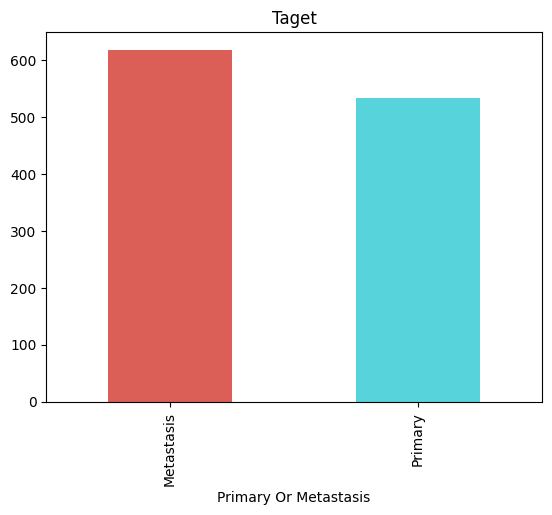

In [23]:
plt.title('Taget')
colors = sns.color_palette('hls',2)
ml_df['Primary Or Metastasis'].value_counts().plot(kind= 'bar',color=colors)
plt.show()

In [24]:
Y = ml_df['Primary Or Metastasis']
X = ml_df.drop(columns=['Primary Or Metastasis','SRRID'], axis=1)
print(Y.shape)
print(X.shape)

(1151,)
(1151, 37235)


In [25]:
from category_encoders import OrdinalEncoder, OneHotEncoder
encoder = OrdinalEncoder()
oneencoder = OneHotEncoder()
Y_ONE = oneencoder.fit_transform(Y)
Y_ONE

,Primary Or Metastasis_1,Primary Or Metastasis_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1146,1,0
1147,0,1
1148,1,0
1149,0,1


In [26]:
Y.value_counts()

Primary Or Metastasis
Metastasis    618
Primary       533
Name: count, dtype: int64

In [27]:
Y_ONE['Primary Or Metastasis_1'].value_counts()

Primary Or Metastasis_1
0    618
1    533
Name: count, dtype: int64

In [28]:
y_taget = Y_ONE['Primary Or Metastasis_1']

In [29]:
# 첫 번째 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_taget, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_taget
)

# 두 번째 split (검증셋 만들 때)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)
print("Train data :", X_train.shape, y_train.shape)
print("Val data :",X_val.shape, y_val.shape)
print("test data :", X_test.shape, y_test.shape)

Train data : (736, 37235) (736,)
Val data : (184, 37235) (184,)
test data : (231, 37235) (231,)


In [30]:
# 기준모델
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델 정확도 : {baseline_acc.round(3)}')
print(classification_report(y_train, baseline))

기준모델 정확도 : 0.537
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       395
           1       0.00      0.00      0.00       341

    accuracy                           0.54       736
   macro avg       0.27      0.50      0.35       736
weighted avg       0.29      0.54      0.37       736



In [31]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
pred_dt = model_dt.predict(X_val)
print(confusion_matrix(y_val, pred_dt))
print(classification_report(y_val, pred_dt))

[[66 33]
 [30 55]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        99
           1       0.62      0.65      0.64        85

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.66      0.66      0.66       184



In [33]:
#RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
pred_rf = model_rf.predict(X_val)
print(confusion_matrix(y_val, pred_rf))
print(classification_report(y_val, pred_rf))

[[79 20]
 [29 56]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        99
           1       0.74      0.66      0.70        85

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



In [35]:
# XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
pred_xgb = model_xgb.predict(X_val)
print(confusion_matrix(y_val, pred_xgb))
print(classification_report(y_val, pred_xgb))

[[85 14]
 [21 64]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.82      0.75      0.79        85

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [37]:
#LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [38]:
pred_log = model_log.predict(X_val)
print(confusion_matrix(y_val, pred_log))
print(classification_report(y_val, pred_log))

[[78 21]
 [20 65]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.76      0.76      0.76        85

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



In [39]:
def plot_feature_importance(importance, names, topn = 'all'):

    # 변수 중요도와 변수 이름을 정렬해서 df로 저장
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    # 변수가 너무 많으면 보기 어려우니, top N 지정
    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 그래프 그리기
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)
    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    # 저장한 변수 중요도 df 반환
    return fi_df

In [41]:
topn = 100

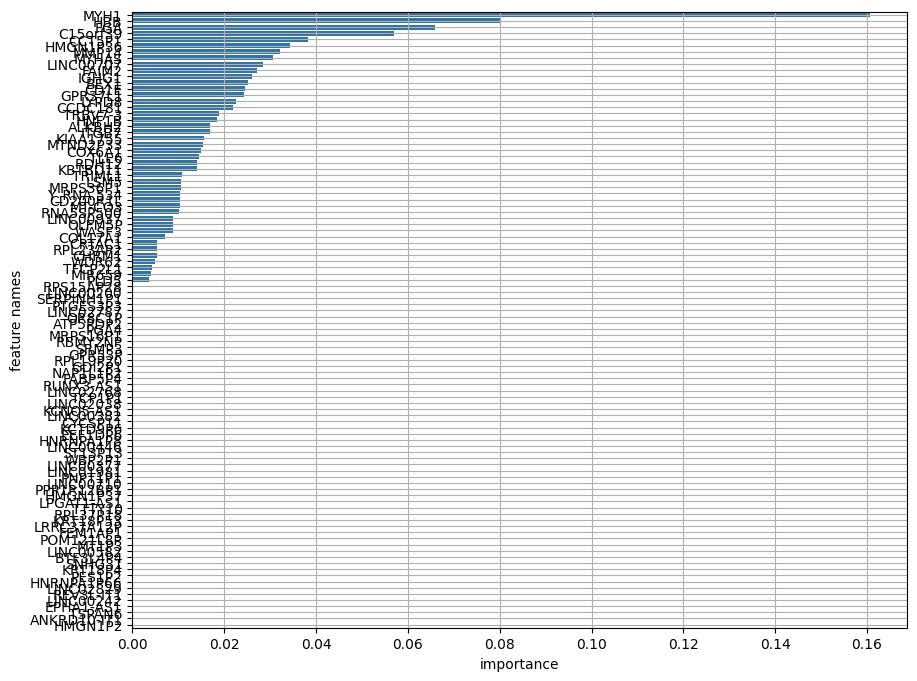

In [42]:
#DecisionTreeClassifier
result_dt = plot_feature_importance(model_dt.feature_importances_, list(X_train), topn = topn)

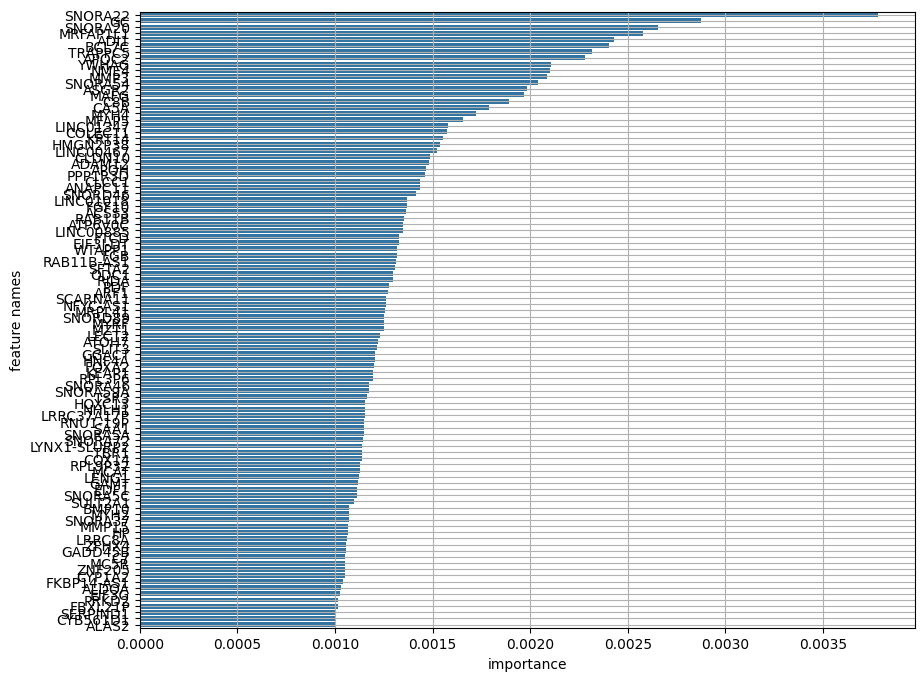

In [43]:
#RandomForestClassifier
result_rf = plot_feature_importance(model_rf.feature_importances_, list(X_train), topn = topn)

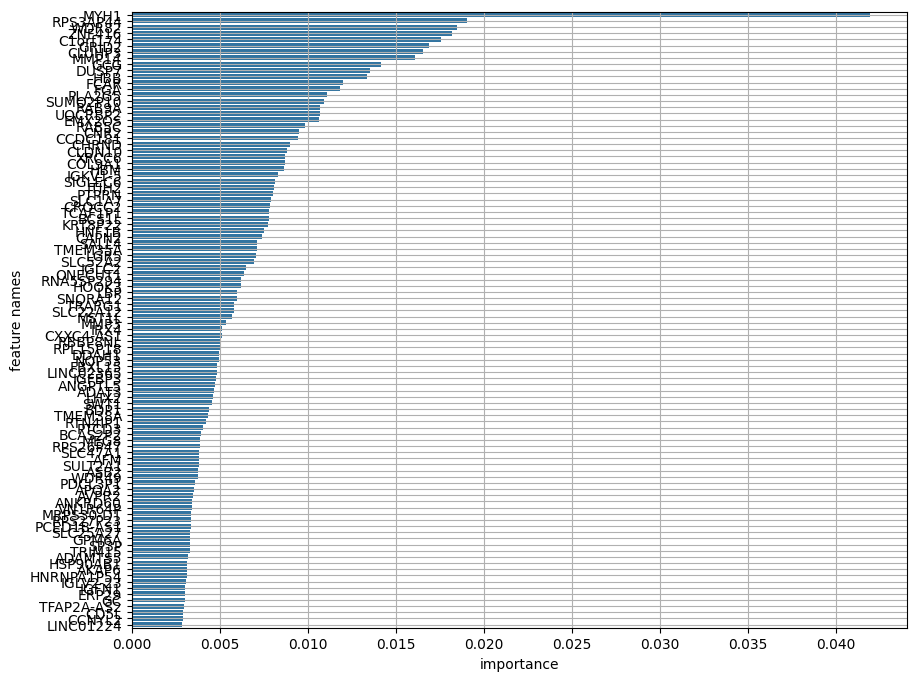

In [44]:
# XGBClassifier
result_xgb = plot_feature_importance(model_xgb.feature_importances_, list(X_train), topn = topn)

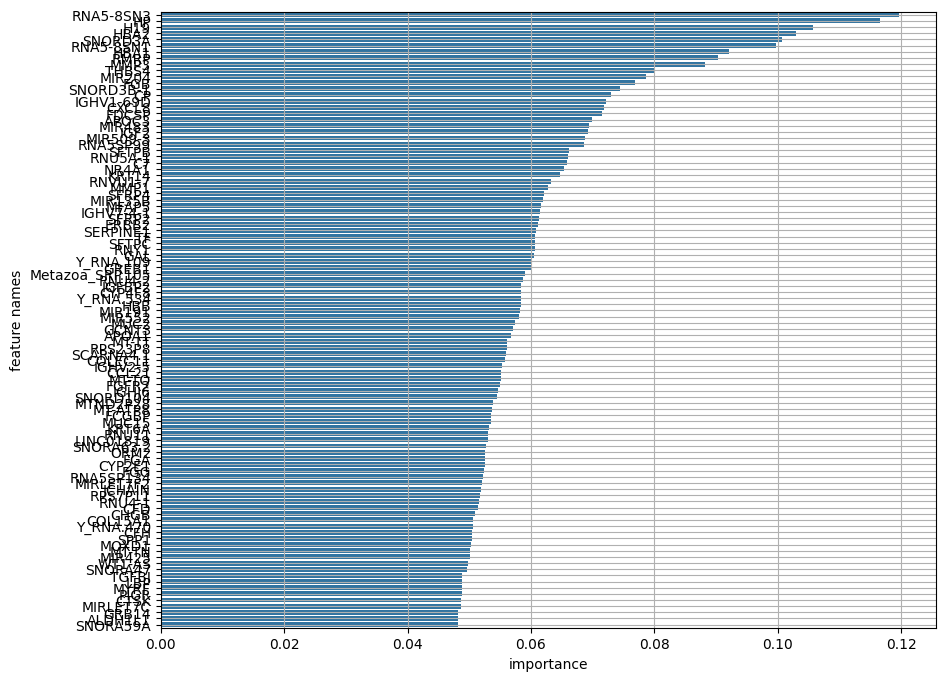

In [45]:
#LogisticRegression
importances = np.abs(model_log.coef_[0])  # 이진분류면 [0]
feature_names = list(X_train.columns)

indices = np.argsort(importances)[::-1][:topn]

result_log = plot_feature_importance(importances, feature_names, topn = topn)

In [46]:
from collections import Counter

DT_col = list(result_dt["feature_names"])
RF_col = list(result_rf["feature_names"])
XGB_col = list(result_xgb["feature_names"])
LOG_col = list(result_log["feature_names"])

imp_col = DT_col + RF_col + XGB_col +LOG_col
Top_col = list(result_dt.iloc[0:10]["feature_names"]) + list(result_rf.iloc[0:10]["feature_names"]) + list(result_xgb.iloc[0:10]["feature_names"]) + list(result_log.iloc[0:10]["feature_names"])
counter = Counter(imp_col)

meta_all_gene_list = list(set(imp_col))
meta_gene_list = [item for item, count in counter.items() if count > 1]
meta_gene_list = list(set(meta_gene_list + Top_col))

print(f'Metastasis gene : {len(meta_gene_list)} / {len(meta_all_gene_list)} (gene/all)')

Metastasis gene : 51 / 377 (gene/all)


In [47]:
print("Train data :", X_train.shape, y_train.shape)
print("Val data :",X_val.shape, y_val.shape)
print("test data :", X_test.shape, y_test.shape)

print(len(meta_gene_list))
X_train_top = X_train[meta_gene_list]
X_val_top = X_val[meta_gene_list]
X_test_top = X_test[meta_gene_list]

print("Train data :", X_train_top.shape, y_train.shape)
print("Val data :",X_val_top.shape, y_val.shape)
print("test data :", X_test_top.shape, y_test.shape)

Train data : (736, 37235) (736,)
Val data : (184, 37235) (184,)
test data : (231, 37235) (231,)
51
Train data : (736, 51) (736,)
Val data : (184, 51) (184,)
test data : (231, 51) (231,)


In [71]:
# DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_top, y_train)

# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_top, y_train)

# XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_top, y_train)

#LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train_top, y_train)

LogisticRegression()

In [72]:
def class_report(model, X_val, y_val):
    pred = model.predict(X_val)
    print(confusion_matrix(y_val, pred))
    print(classification_report(y_val, pred))

In [73]:
print("DecisionTreeClassifier")
class_report(model_dt, X_val_top, y_val)

print("RandomForestClassifier")
class_report(model_rf, X_val_top, y_val)

print("XGBClassifier")
class_report(model_xgb, X_val_top, y_val)

print("LogisticRegression")
class_report(model_log, X_val_top, y_val)

DecisionTreeClassifier
[[75 24]
 [26 59]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        99
           1       0.71      0.69      0.70        85

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184

RandomForestClassifier
[[80 19]
 [23 62]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        99
           1       0.77      0.73      0.75        85

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184

XGBClassifier
[[78 21]
 [17 68]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.76      0.80      0.78        85

    accuracy                           0.79       184
   macro av

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
# DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train_top, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [75]:
# DecisionTreeClassifier
model_dt = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = None,
    max_features = None,
    min_samples_leaf = 1,
    min_samples_split = 5
)

model_dt.fit(X_train_top, y_train)

pred = model_dt.predict(X_val_top)
print(confusion_matrix(y_val, pred))
print("검증 AUC: ", model_dt.score(X_val_top, y_val))
print(classification_report(y_val, pred))

[[70 29]
 [20 65]]
검증 AUC:  0.7336956521739131
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        99
           1       0.69      0.76      0.73        85

    accuracy                           0.73       184
   macro avg       0.73      0.74      0.73       184
weighted avg       0.74      0.73      0.73       184



In [76]:
# RandomForestClassifier
param_grid_rf = {
    # Decision Tree와 공통
    'criterion':        ['gini', 'entropy'],
    'max_depth':        [3, 5, 7, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features':     [None, 'sqrt', 'log2'],

    # Random Forest 전용
    'n_estimators':     [100, 200, 500],   # 트리 개수
    'bootstrap':        [True, False],     # 샘플링 방식
    'oob_score':        [False, True],     # OOB 검증 사용 여부
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,          # 병렬 처리
    verbose=2
)

grid_search_rf.fit(X_train_top, y_train)
print("Best RF params:", grid_search_rf.best_params_)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, mi

In [77]:
# bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 
# 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False
# RandomForestClassifier
model_rf = RandomForestClassifier(
    bootstrap = False,
    criterion = 'gini',
    max_depth = None,
    max_features = 'sqrt',
    min_samples_leaf = 3, 
    min_samples_split = 2,
    n_estimators = 100,
    oob_score = False
)
model_rf.fit(X_train_top, y_train)

pred = model_rf.predict(X_val_top)
print(confusion_matrix(y_val, pred))
print("검증 AUC: ", model_rf.score(X_val_top, y_val))
print(classification_report(y_val, pred))

[[81 18]
 [20 65]]
검증 AUC:  0.7934782608695652
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.78      0.76      0.77        85

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



In [82]:
# 1) XGBClassifier용 파라미터 그리드
param_grid_xgb = {
    'max_depth':        [3, 5, 7, 10],
    'learning_rate':    [0.01, 0.1, 0.2],
    'subsample':        [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma':            [0, 0.1, 0.2],
    'reg_alpha':        [0, 0.01, 0.1],
    'reg_lambda':       [1, 1.5, 2],
    'n_estimators':     [100, 200, 500]
}

grid_search_xgb = GridSearchCV(
    XGBClassifier(
        eval_metric='logloss',
        random_state=42
    ),
    param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_top, y_train)
print("Best RF params:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Best RF params: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.6}


In [85]:
# XGBClassifier
model_xgb = XGBClassifier(
    max_depth = 5,
    learning_rate = 0.2,
    subsample = 0.6,
    colsample_bytree = 0.6,
    gamma = 0.2,
    reg_alpha = 0,
    reg_lambda = 1.5,
    n_estimators = 200,
)

watchlist = [(X_train_top, y_train), (X_val_top, y_val)]

model_xgb.fit(
    X_train_top,
    y_train,
    eval_set=watchlist)

pred = model_xgb.predict(X_val_top)
print(confusion_matrix(y_val, pred))
print("검증 AUC: ", model_xgb.score(X_val_top, y_val))
print(classification_report(y_val, pred))

[0]	validation_0-logloss:0.61438	validation_1-logloss:0.64632
[1]	validation_0-logloss:0.53618	validation_1-logloss:0.59277
[2]	validation_0-logloss:0.48692	validation_1-logloss:0.56050
[3]	validation_0-logloss:0.44410	validation_1-logloss:0.53369
[4]	validation_0-logloss:0.40377	validation_1-logloss:0.51889
[1]	validation_0-logloss:0.53618	validation_1-logloss:0.59277
[2]	validation_0-logloss:0.48692	validation_1-logloss:0.56050
[3]	validation_0-logloss:0.44410	validation_1-logloss:0.53369
[4]	validation_0-logloss:0.40377	validation_1-logloss:0.51889
[5]	validation_0-logloss:0.37760	validation_1-logloss:0.50144
[6]	validation_0-logloss:0.35132	validation_1-logloss:0.48373
[7]	validation_0-logloss:0.32049	validation_1-logloss:0.47639
[8]	validation_0-logloss:0.29767	validation_1-logloss:0.45989
[9]	validation_0-logloss:0.27722	validation_1-logloss:0.45978
[10]	validation_0-logloss:0.26380	validation_1-logloss:0.45118
[11]	validation_0-logloss:0.24742	validation_1-logloss:0.44605
[12]	v

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning

In [88]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr',     LogisticRegression(random_state=42))
])

param_grid_lr = [
    # L2 규제
    {
      'lr__penalty':  ['l2'],
      'lr__C':        [0.01, 0.1, 1, 10, 100],
      'lr__solver':   ['lbfgs', 'sag', 'newton-cg'],
      'lr__max_iter': [500, 1000]
    },
    # L1 규제
    {
      'lr__penalty':  ['l1'],
      'lr__C':        [0.01, 0.1, 1, 10],
      'lr__solver':   ['liblinear', 'saga'],
      'lr__max_iter': [500, 1000]
    },
    # ElasticNet 규제
    {
      'lr__penalty':  ['elasticnet'],
      'lr__C':        [0.01, 0.1, 1, 10],
      'lr__l1_ratio':[0.25, 0.5, 0.75],
      'lr__solver':   ['saga'],
      'lr__max_iter': [500, 1000]
    },
    # 규제 없음
    {
      'lr__penalty':  [None],           # 'none' 대신 None
      'lr__solver':   ['newton-cg', 'lbfgs', 'sag'],
      'lr__max_iter': [500, 1000]
    },
]

grid_search_lr = GridSearchCV(
    pipe,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train_top, y_train)
print("Best LR params:", grid_search_lr.best_params_)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
Best LR params: {'lr__C': 1, 'lr__max_iter': 500, 'lr__penalty': 'l1', 'lr__solver': 'saga'}


In [90]:
#LogisticRegression
model_log = LogisticRegression(
    penalty = 'l1',
    C = 1,
    solver = 'saga',
    max_iter = 500
)
model_log.fit(X_train_top, y_train)

pred = model_log.predict(X_val_top)
print(confusion_matrix(y_val, pred))
print("검증 AUC: ", model_log.score(X_val_top, y_val))
print(classification_report(y_val, pred))

[[72 27]
 [25 60]]
검증 AUC:  0.717391304347826
              precision    recall  f1-score   support

           0       0.74      0.73      0.73        99
           1       0.69      0.71      0.70        85

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



In [51]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [52]:
import random

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

In [54]:
X_train_top.shape

(736, 51)

In [91]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # input
            nn.Linear(51, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3), 

            # hidden
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.3), 
            # h2
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            # h3
            nn.Linear(64, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(0.2),

            # Output
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using mps device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=51, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=256, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=8, bias=True)
    (13): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.2, inplace=False)
    (16): Lin

In [92]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(1)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [93]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y = y.unsqueeze(1)    # (batch, 1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            pred_label = (pred > 0.5).float()    # 0.5 기준으로 이진화
            correct += (pred_label == y).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_top, y_train)

noise_std = 0.01 * X_res.std(axis=0)  # 각 feature별 표준편차의 1%
X_aug = X_res + np.random.normal(0, noise_std, X_res.shape)

In [95]:
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_aug.values , dtype=torch.float32)
y_train_tensor = torch.tensor(y_res.values , dtype=torch.float32)   # 이진분류면 float, 다중분류면 long
X_val_tensor = torch.tensor(X_val_top.values , dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values , dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_top.values , dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values , dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [96]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.680075  [   32/  790]
loss: 0.626825  [  352/  790]
loss: 0.618441  [  672/  790]
Test Error: 
 Accuracy: 67.4%, Avg loss: 0.606457 

Epoch 2
-------------------------------
loss: 0.560511  [   32/  790]
loss: 0.437122  [  352/  790]
loss: 0.443418  [  672/  790]
Test Error: 
 Accuracy: 73.4%, Avg loss: 0.586515 

Epoch 3
-------------------------------
loss: 0.441235  [   32/  790]
loss: 0.369862  [  352/  790]
loss: 0.294370  [  672/  790]
Test Error: 
 Accuracy: 74.5%, Avg loss: 0.645384 

Epoch 4
-------------------------------
loss: 0.481662  [   32/  790]
loss: 0.321326  [  352/  790]
loss: 0.294654  [  672/  790]
Test Error: 
 Accuracy: 73.4%, Avg loss: 0.621229 

Epoch 5
-------------------------------
loss: 0.451154  [   32/  790]
loss: 0.264910  [  352/  790]
loss: 0.202644  [  672/  790]
Test Error: 
 Accuracy: 72.3%, Avg loss: 0.660578 

Epoch 6
-------------------------------
loss: 0.305316  [   32/  790]
loss: 0.261738  [  3